In [3]:
from scipy.io.wavfile import read
import numpy as np
%matplotlib inline
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

In [4]:
!wget -q 'https://github.com/sammy-suyama/BayesBook/blob/master/data/organ.wav?raw=true' -P ../data
!mv ../data/organ.wav?raw=true ../data/organ.wav

In [5]:
wavfile = "../data/organ.wav"
fs, data = read(wavfile)

input = data[10000:318000,1]
print(input.shape)

(308000,)


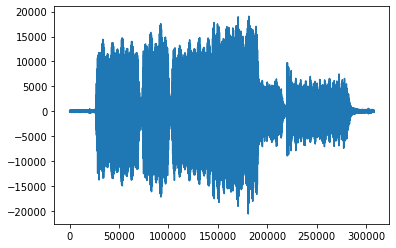

In [6]:
plt.plot(input)

input: 308000
input/NFFT: 1203.125
Pxx.shape: (129, 1203)


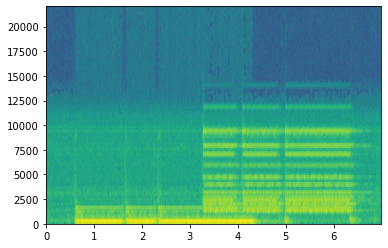

In [7]:
# Reference
# - https://qiita.com/greenteabiscuit/items/c9c2b26f8797d29f1d3a
# - https://download.tek.com/document/RTSA_Overlap_FFT_AppNote_37Z-18839-1.pdf

Pxx, freqs, t, pl = plt.specgram(input, Fs=fs, NFFT=256, noverlap=0)
print(f"input: {len(input)}")
print(f"input/NFFT: {len(input)/256}")
print(f"Pxx.shape: {Pxx.shape}")

In [8]:
import numpy as np
import NMF

In [9]:
# D, N = (3,3)
# X = np.ones(D*N).reshape(D, N)
X = Pxx
D, N = X.shape
print(f"D:{D}, N:{N}")

K = 2
a_t = 1.0
b_t = 1.0
a_v = 1.0
b_v = 100.0
prior = NMF.NMFModel(a_t * np.ones((D,K)), b_t * np.ones((D,K)), a_v, b_v)

max_iter = 100
posterior, S_est, T_est, V_est = NMF.VI(np.round(X), prior, max_iter)

X = np.dot(T_est, V_est)

D:129, N:1203


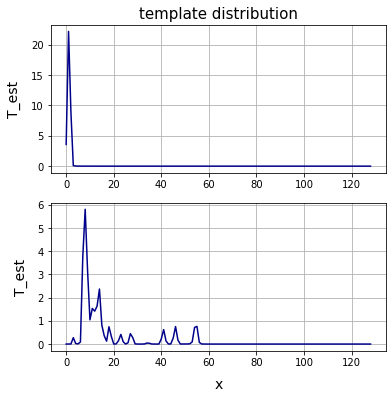

In [10]:
fig = plt.figure(figsize = (6,6))

for k in range(K):
    x = T_est[:,k]
    ax = fig.add_subplot(K,1,k+1)
    ax.plot(x,color="darkblue")
    if k==0:  ax.set_title("template distribution", size=15)
    ax.grid()
    ax.set_xlabel("x", size=14, labelpad=10)
    ax.set_ylabel("T_est", size=14, labelpad=10)

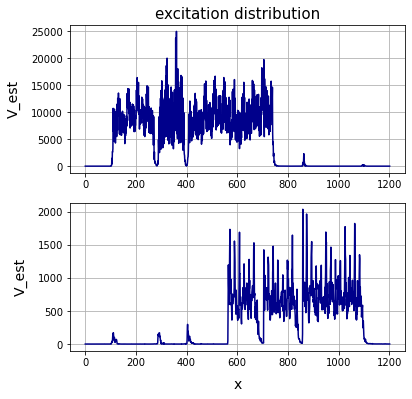

In [11]:
fig = plt.figure(figsize = (6,6))

for k in range(K):
    x = V_est[k,:]
    ax = fig.add_subplot(K,1,k+1)
    ax.plot(x,color="darkblue")
    if k==0:  ax.set_title("excitation distribution", size=15)
    ax.grid()
    ax.set_xlabel("x", size=14, labelpad=10)
    ax.set_ylabel("V_est", size=14, labelpad=10)

# logsumexp
- Reference
  - https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.logsumexp.html

In [23]:
from scipy.special import logsumexp
a = np.arange(10)
print(a)
print(np.log(np.sum(np.exp(a))))
print(logsumexp(a))


[0 1 2 3 4 5 6 7 8 9]
9.45862974442671
9.45862974442671


# gamma function
- Reference
  - https://mathworld.wolfram.com/GammaFunction.html
  - https://mathworld.wolfram.com/DigammaFunction.html
  - https://python.atelierkobato.com/gamma/

In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [13]:
import numpy as np
from scipy.special import gamma

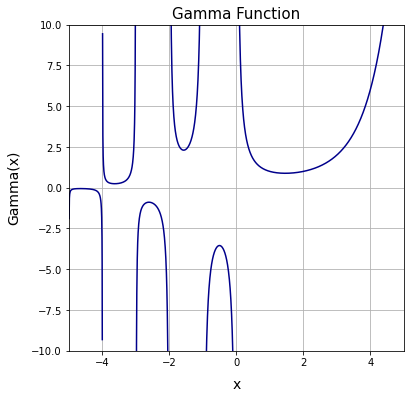

In [14]:
x = np.linspace(-5, 5, 2251)
y = gamma(x)

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ax.set_title("Gamma Function", size=15)
ax.grid()
ax.set_xlim(-5,5)
ax.set_ylim(-10,10)
ax.set_xlabel("x", size=14, labelpad=10)
ax.set_ylabel("Gamma(x)", size=14, labelpad=10)
ax.plot(x,y,color="darkblue")

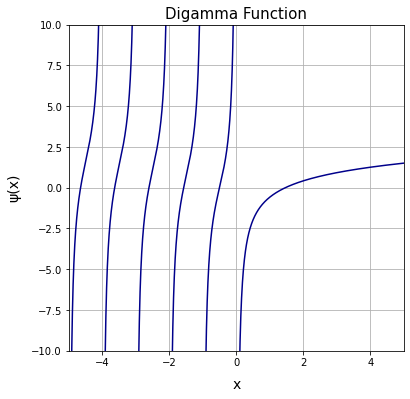

In [15]:
from scipy.special import psi

x = np.linspace(-5,5,2251)
y = psi(x)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_title("Digamma Function", size=15)
ax.grid()
ax.set_xlim(-5,5)
ax.set_ylim(-10,10)
ax.set_xlabel("x",size=14,labelpad=10)
ax.set_ylabel("ψ(x)", size=14, labelpad=10)
ax.plot(x,y,color="darkblue")

# elementwise matrix  multipilcation and devision
- Reference
  - https://numpy.org/doc/stable/reference/generated/numpy.multiply.html
  - https://numpy.org/doc/stable/reference/generated/numpy.divide.html

In [30]:
x1 = np.arange(9.0).reshape((3, 3))
x2 = np.arange(9.0).reshape((3, 3))
print(f"x1:\n {x1}")
print(f"x2:\n {x2}")

x1:
 [[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
x2:
 [[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


In [34]:
np.multiply(x1, x2)

array([[ 0.,  1.,  4.],
       [ 9., 16., 25.],
       [36., 49., 64.]])

In [35]:
np.divide(x1, x2)

/var/folders/kp/rl3m_pnn4cj9fc178tl7jrf00000gn/T/ipykernel_77883/1837560961.py:1: RuntimeWarning: invalid value encountered in true_divide
  np.divide(x1, x2)


array([[nan,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [36]:
# inner product
np.dot(x1,x2)

array([[ 15.,  18.,  21.],
       [ 42.,  54.,  66.],
       [ 69.,  90., 111.]])

In [40]:
a = np.arange(9)
np.exp(a)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03])

In [43]:
A = np.arange(9).reshape(3,3)
np.sum(A, axis=0, keepdims=True)

array([[ 9, 12, 15]])